In [ ]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# the dataset was uploaded to the drive and exported from drive
# link to the dataset https://physionet.org/content/mitdb/1.0.0/
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/ECG_data")
import pandas as pd

In [ ]:
# read the test and train dataset seprately as dataframes
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [ ]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
#check for the balance in the dataset across the classes
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64


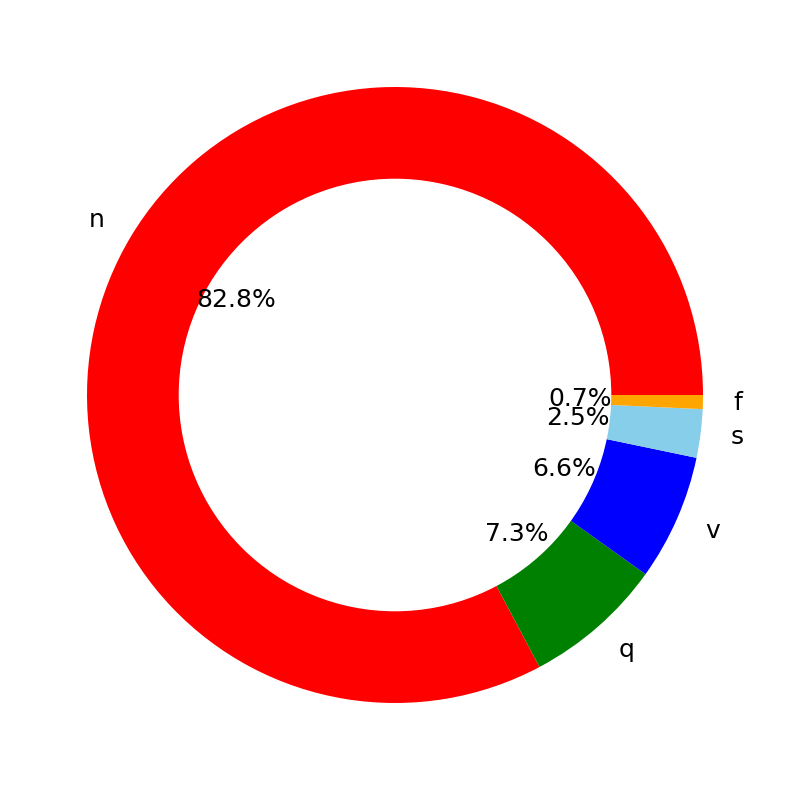

In [ ]:
#Plot the pie chart to show the distribution across the classes
import matplotlib.pyplot as plt

# Set font size for all text elements in the plot
plt.rcParams['font.size'] = 18

plt.figure(figsize=(20,10))
my_circle = plt.Circle((0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n', 'q', 'v', 's', 'f'], colors=['red', 'green', 'blue', 'skyblue', 'orange'], autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# Upsample the minority classes and create another dataframe
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
# The upsampled Data is as below
equilibre=train_df[187].value_counts()
print(equilibre)

187
0    20000
1    20000
2    20000
3    20000
4    20000
Name: count, dtype: int64


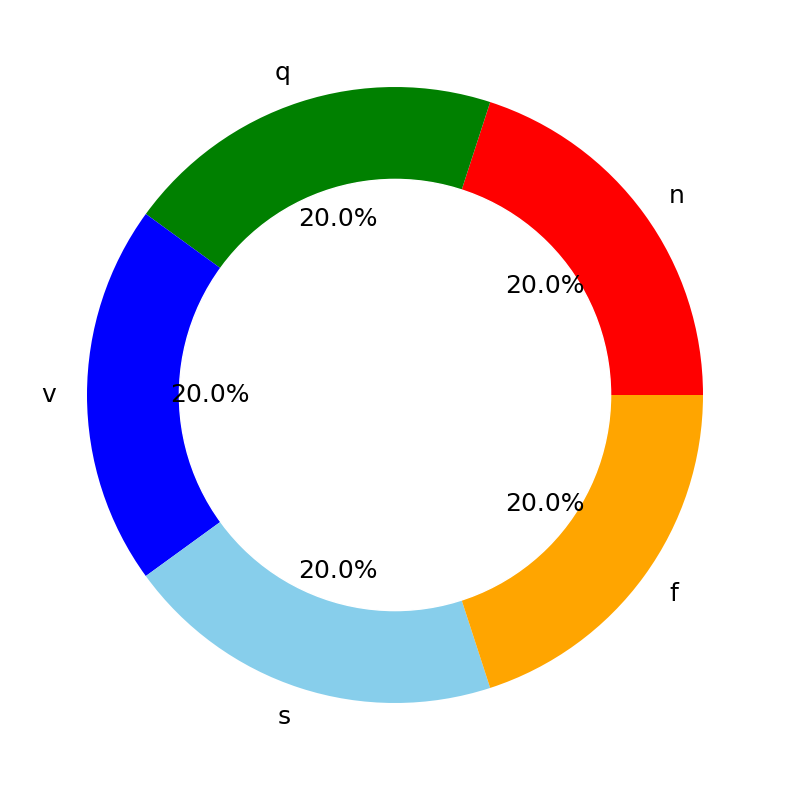

In [ ]:
# plot the upsampled data to show the distibution of data across the classes
plt.rcParams['font.size'] = 18
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
57222,0.885965,0.888158,0.410088,0.026316,0.015351,0.057018,0.070175,0.065789,0.065789,0.054825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72703,0.910891,0.967822,0.195545,0.000000,0.227723,0.297030,0.277228,0.272277,0.272277,0.267327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75810,0.738506,0.704023,0.333333,0.054598,0.000000,0.155172,0.275862,0.396552,0.376437,0.402299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80756,1.000000,0.907522,0.643650,0.339088,0.138101,0.115906,0.120838,0.099877,0.075216,0.066584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
85830,0.990323,0.837097,0.770968,0.696774,0.669355,0.737097,0.701613,0.625806,0.461290,0.433871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


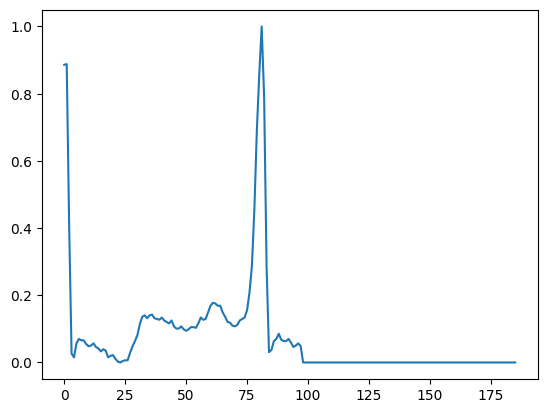

In [ ]:
 # plot the graph to show the variation in the feature values for each specific points of the data
 plt.plot(c.iloc[0,:186])

In [ ]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

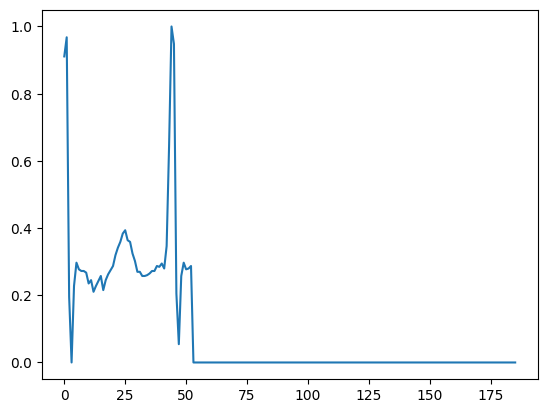

In [ ]:
 plt.plot(c.iloc[1,:186])

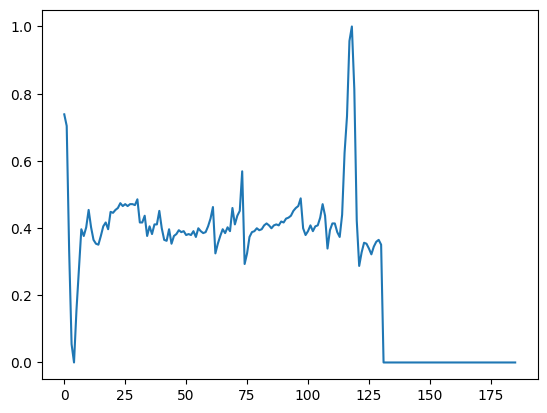

In [ ]:
 plt.plot(c.iloc[2,:186])

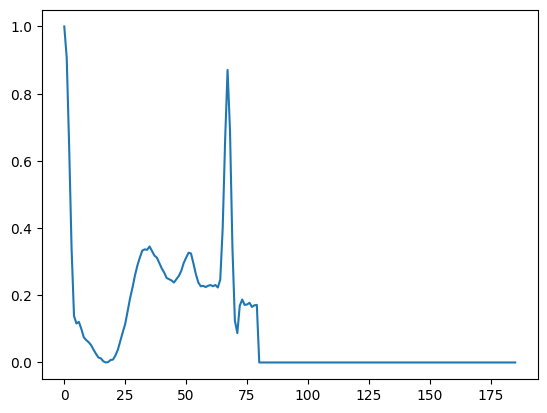

In [ ]:
plt.plot(c.iloc[3,:186])

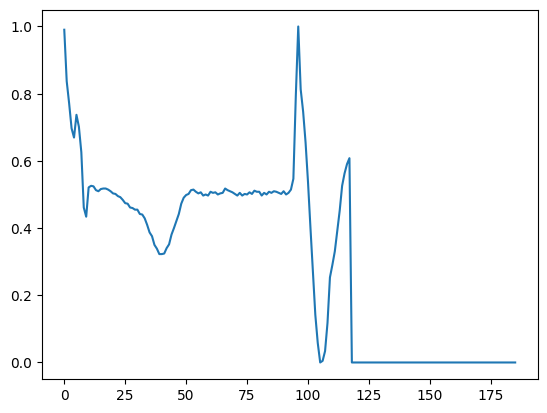

In [ ]:
plt.plot(c.iloc[4,:186])

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.02,186)
    return (signal+noise)

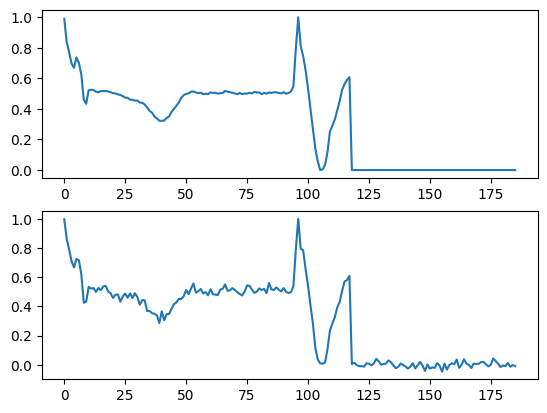

In [ ]:
tempo=c.iloc[4,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[4,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
# define the training and test dataset for the machine learning models
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
# for i in range(len(X_train)):
#     X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

# ML Models Implementation

### SVM

In [ ]:
train_target=train_df[187]
test_target=test_df[187]
train=train_df.drop(187,axis=1)
test=test_df.drop(187,axis=1)

In [ ]:
#SVM Implementation
from sklearn.svm import SVC
model = SVC(cache_size=500)
model.fit(train,train_target)

SVC(cache_size=500)

In [ ]:
# Model prediction
predictions = model.predict(test)

In [ ]:
# Model performance report
report=classification_report(test_target, predictions, digits=4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9901    0.9023    0.9442     18118
         1.0     0.3582    0.8201    0.4986       556
         2.0     0.8506    0.9199    0.8839      1448
         3.0     0.1656    0.9321    0.2812       162
         4.0     0.9583    0.9708    0.9645      1608

    accuracy                         0.9066     21892
   macro avg     0.6645    0.9090    0.7145     21892
weighted avg     0.9564    0.9066    0.9254     21892



### Random Forest

In [ ]:
#Random forest model implementation with the performance report
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC(n_jobs = -1)
model.fit(train,train_target)
model.score(train,train_target)
predictions = model.predict(test)
report=classification_report(test_target, predictions, digits=4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9841    0.9901    0.9871     18118
         1.0     0.8231    0.7446    0.7819       556
         2.0     0.9415    0.9330    0.9372      1448
         3.0     0.8138    0.7284    0.7687       162
         4.0     0.9804    0.9633    0.9718      1608

    accuracy                         0.9762     21892
   macro avg     0.9086    0.8719    0.8893     21892
weighted avg     0.9756    0.9762    0.9758     21892



### XGBoost

In [ ]:
#XGBoost implementation with the perforance report
import xgboost as XGB
model = XGB.XGBClassifier(objective='binary:logistic')
model.fit(train,train_target)
model.score(train,train_target)
predictions = model.predict(test)
report=classification_report(test_target, predictions, digits=4)
print(report)

              precision    recall  f1-score   support

         0.0     0.9899    0.9806    0.9852     18118
         1.0     0.6868    0.7968    0.7377       556
         2.0     0.9180    0.9510    0.9342      1448
         3.0     0.7500    0.8519    0.7977       162
         4.0     0.9759    0.9807    0.9783      1608

    accuracy                         0.9730     21892
   macro avg     0.8641    0.9122    0.8866     21892
weighted avg     0.9747    0.9730    0.9737     21892



# CNN-LSTM Implementation to classify the ECG

To extract the features automatically and increase the heart
beat classification accuracy, deep-learning based algorithms including deep convolutional neuralnetworks and recurrent neuralnetworks have recently been proposed.

In [ ]:
# the function build_network function defines a CNN+LSTM neural network architecture for ECG classification, with customizable hyperparameters and metrics for training.
im_shape = (X_train.shape[1],1)
def build_network(hp):
    inputs_cnn = Input(shape=im_shape,name="inputs_cnn")
    model = keras.Sequential()
    for i in range(3):
        model.add(Convolution1D(filters= hp.Int(f'conv_{i} filters',min_value=64,max_value=256,step=16),kernel_size=hp.Choice(f'conv{i} units',values=[2,3,4,5]),input_shape=im_shape,activation="relu",padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPool1D(pool_size=hp.Choice(f'pool_{i} size',values=[2,3,5]),strides=hp.Choice(f'pool_{i} stride',values=[2,3,5]),padding='same'))

    for i in range(hp.Choice('LSTM layers',values=[2,3])):
        return_sequences = i < hp.Choice('LSTM_layers', values=[2, 3]) - 1  # Return sequences for all but last layer
        model.add(LSTM(units=hp.Int(f'LSTM_layer{i}_filters', min_value=32, max_value=128, step=16),
                       return_sequences=return_sequences))
    model.add(Flatten())
    for i in range(2):
        model.add(Dense(units=hp.Int(f'dense{i} units',min_value=32,max_value=128,step=16),activation='relu'))

    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3,1e-5])),loss="categorical_crossentropy",metrics=['accuracy',keras.metrics.TruePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalsePositives(),keras.metrics.FalseNegatives()])

    return model

In [ ]:
# The network function trains the best-tuned model with early stopping and model checkpointing and returns the trained model along with its training history.
def network():
    model = tuner_search.get_best_models(num_models=1)[0]
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=15,callbacks=callbacks, batch_size=64,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
# define the model CNN-LSTM model architecture with the activation functions and dense layers and output layer
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    lstm_layer = LSTM(64)(pool3)
    flatten=Flatten()(lstm_layer)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)


    model = Model(inputs = inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy',keras.metrics.TruePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalsePositives(),keras.metrics.FalseNegatives()])


    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=30,callbacks=callbacks, batch_size=64,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
#define the evaluation function to evaluate on the accuracy, sensitivity and Specificity of the Neural network
import numpy as np
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Loss: %.2f%%" % (scores[0]*100))
    print("Accuracy: %.2f%%" % (scores[1]*100))
    speci = scores[3] / (scores[3]+ scores[4])
    sensi = scores[2] / (scores[2]+scores[5])
    print("speci: %.2f%%" % (speci*100))
    print("Sensitivity: %.2f%%" % (sensi*100))

#     print(history)
    fig1, ax_acc = plt.subplots(1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    specilist = []
    for i in history.history['val_true_positives']:
        temp = i / (i+ history.history['val_false_negatives'][history.history['val_true_positives'].index(i)])
        specilist.append(temp)



    fig2, ax_pre = plt.subplots()
    plt.plot(specilist)
    plt.xlabel('Epoch')
    plt.ylabel('TP')
    plt.title('Model - Sensi')
    plt.tight_layout()
    plt.legend(['Training', 'Validation',], loc='lower right')
    plt.show()

    sensilist = []
    for i in history.history['val_true_negatives']:
        temp = i / (i+ history.history['val_false_positives'][history.history['val_true_negatives'].index(i)])
        sensilist.append(temp)



    fig3, ax_pre = plt.subplots()
    plt.plot(specilist)
    plt.xlabel('Epoch')
    plt.ylabel('TP')
    plt.title('Model - Specificity')
    plt.tight_layout()
    plt.legend(['Training', 'Validation',], loc='lower right')
    plt.show()
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
# build the model on the data
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, LSTM
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/30
1563/1563 [==============================] - 161s 96ms/step - loss: 0.3667 - accuracy: 0.8654 - true_positives: 83627.0000 - true_negatives: 390981.0000 - false_positives: 9019.0000 - false_negatives: 16373.0000 - val_loss: 0.3095 - val_accuracy: 0.8892 - val_true_positives: 19268.0000 - val_true_negatives: 85441.0000 - val_false_positives: 2127.0000 - val_false_negatives: 2624.0000
Epoch 2/30
1563/1563 [==============================] - 130s 83ms/step - loss: 0.1445 - accuracy: 0.9494 - true_positives: 94494.0000 - true_negatives: 395415.0000 - false_positives: 4585.0000 - false_negatives: 5506.0000 - val_loss: 0.1697 - val_accuracy: 0.9387 - val_true_positives: 20485.0000 - val_true_negatives: 86316.0000 - val_false_positives: 1252.0000 - val_false_negatives: 1407.0000
Epoch 3/30
1563/1563 [==============================] - 123s 79ms/step - loss: 0.1019 - accuracy: 0.9643 - true_positives: 96190.0000 - true_negatives: 396667.0000 - false_positives: 3333.0000 - false_negati

In [ ]:
# check the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 186, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 181, 64)           448       
                                                                 
 batch_normalization (Batch  (None, 181, 64)           256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 91, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 89, 64)            12352     
                                                                 
 batch_normalization_1 (Bat  (None, 89, 64)            256   

Loss: 11.13%
Accuracy: 97.52%
speci: 99.39%
Sensitivity: 97.49%


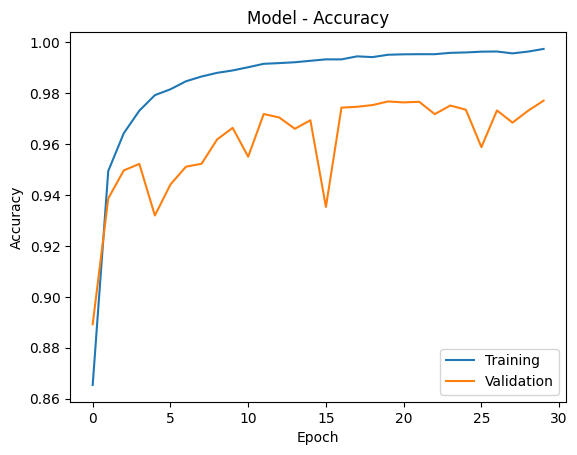

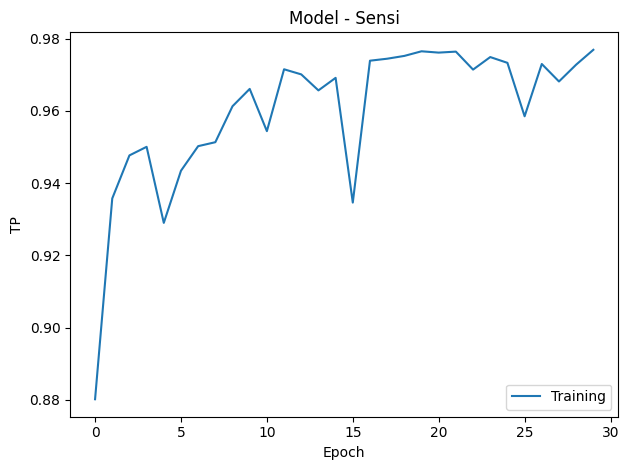

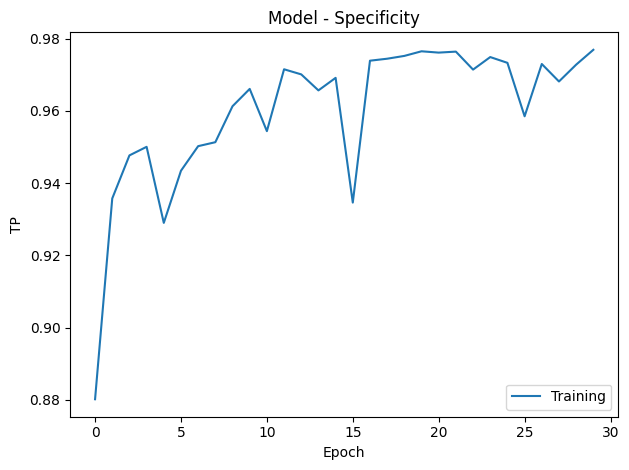

685/685 [==============================] - 18s 21ms/step
Actual: [1. 0. 0. 0. 0.]


array([9.9965894e-01, 7.6136464e-05, 6.1785299e-06, 2.4850242e-04,
       1.0271436e-05], dtype=float32)

In [ ]:
#evalaution metrics of the model with graphs
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)
print("Actual:",y_test[10])
y_pred[10]

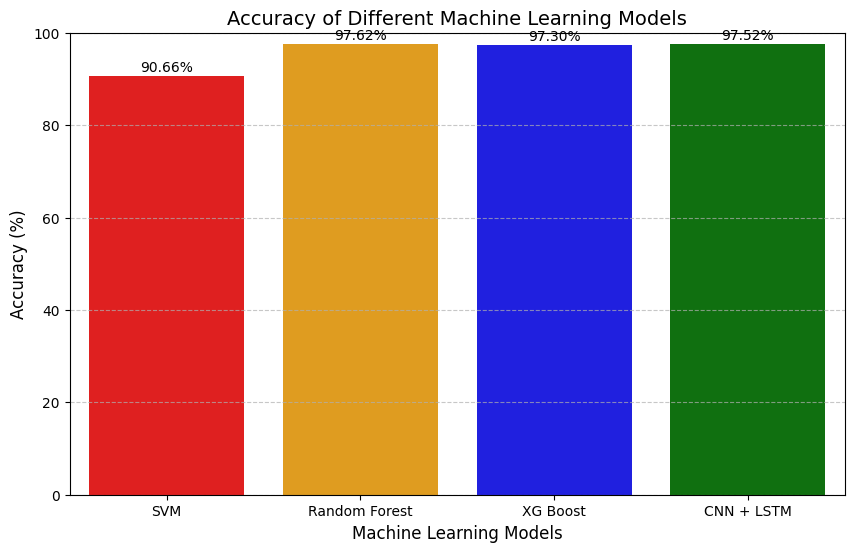

In [ ]:
# Visulaize accuracies of different Machine learning models used
import seaborn as sns
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'Random Forest', 'XG Boost', 'CNN + LSTM']

# Accuracies in percentages
accuracies = [90.66, 97.62, 97.30, 97.52]

# Define colors similar to the provided image
colors = ['#FF0000', '#FFA500', '#0000FF', '#008000']

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=accuracies, palette=colors)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy of Different Machine Learning Models', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of each bar
for i in range(len(models)):
    plt.text(x=i, y=accuracies[i] + 1, s=f'{accuracies[i]:.2f}%', ha='center', fontsize=10)

plt.show()


[[17762   204    46    39    67]
 [   64   476    12     3     1]
 [   27     9  1389    18     5]
 [   14     0    22   126     0]
 [    6     4     3     0  1595]]
Normalized confusion matrix


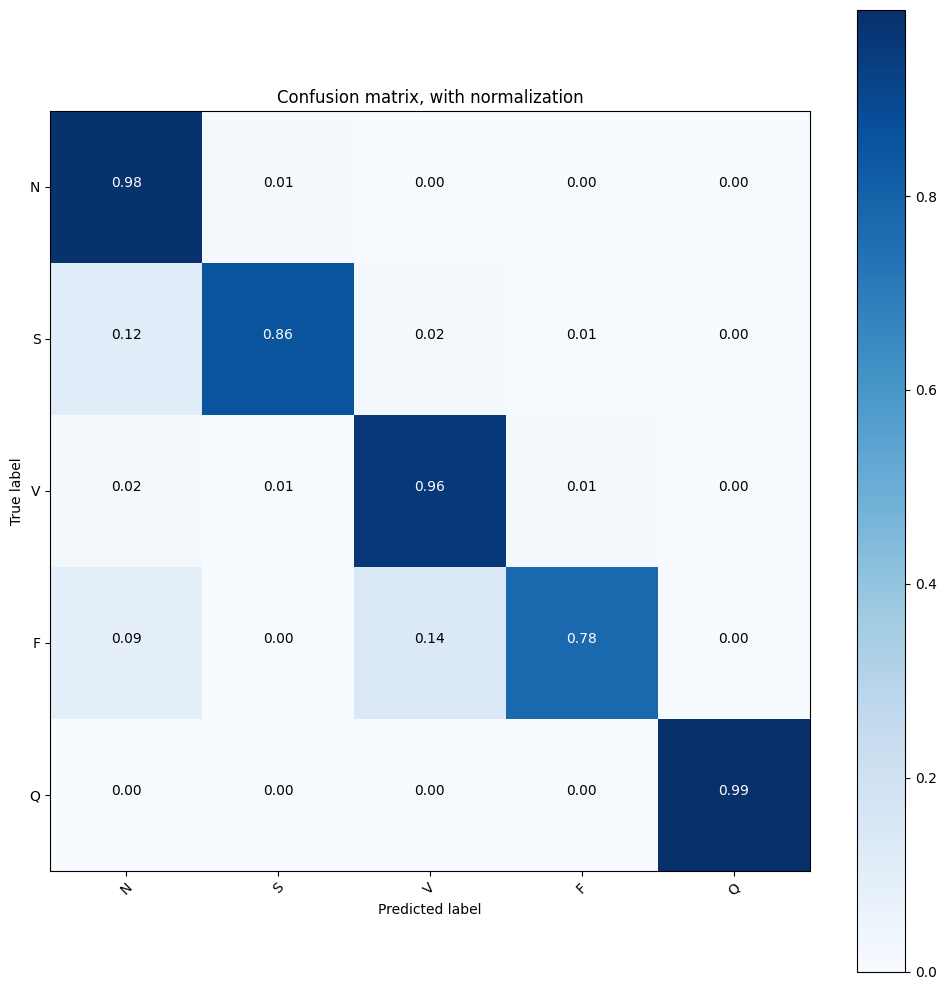

In [ ]:
#plot the confusion matrix of the CNN-LSTM model
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)
np.set_printoptions(precision=2)




# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()